In [3]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
# First experience with CAPTCHA...
#import requests
#first = requests.get('http://www.pdga.com/players?FirstName=&LastName=&PDGANum=&Status=All&Gender=All&Class=All&MemberType=All&City=&StateProv=All&Country=All&Country_1=All&UpdateDate=&order=Rating_1&sort=desc')
#second = requests.get('https://www.pdga.com/players?FirstName=&LastName=&PDGANum=&Status=All&Gender=All&Class=All&MemberType=All&City=&StateProv=All&Country=All&Country_1=All&UpdateDate=&order=Rating_1&sort=desc&page=1')
#urls = []
#for x in range(1,150):
#    urls.append('http://www.pdga.com/players?FirstName=&LastName=&PDGANum=&Status=All&Gender=All&Class=All&MemberType=All&City=&StateProv=All&Country=All&Country_1=All&UpdateDate=&order=Rating_1&sort=desc&page={}'.format(x))
#df_lst = []
#df_lst.append(pd.read_html(first.text)[0])
#for url in urls:
#    x = requests.get(url)
#    df = pd.read_html(x.text)[0]
#    df_lst.append(df)
#pdga_df = pd.concat(df_lst).reset_index()  
#pdga_df.to_excel('disc_golfers.xlsx')
dg_df = pd.read_excel('disc_golfers.xlsx')
dg_df['State/Prov'] = dg_df['State/Prov'].fillna('INT')
top_earners = pd.read_excel('top_earners.xlsx').drop(columns=['Unnamed: 0']).drop(columns=['index']).drop(columns=['Class']).drop(columns=['Year'])

In [4]:
#Creating a Region column
region_dict = {
    'West' : ['WA', 'OR', 'ID', 'MT', 'CA', 'NV', 'UT', 'CO', 'AK', 'HI'],
    'Southwest' : ['AZ', 'NM', 'TX', 'OK'],
    'Midwest' : ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'MI', 'IL', 'IN', 'OH', 'WY'],
    'Southeast' : ['AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'WV', 'VA', 'NC', 'SC', 'GA', 'FL'],
    'Northeast' : ['PA', 'NY', 'VT', 'NH', 'ME', 'MA', 'RI', 'CT', 'NJ', 'DE', 'MD', 'DC']
}
state_region = {'INT' : 'International'}
for key in region_dict:
    for state in region_dict[key]:
        state_region[state] = key
states = [key for key in state_region]
dg_states = dg_df['State/Prov'].unique()
extra = []
inter = []
for item in dg_states:
    if item not in states:
        extra.append(item)
        inter.append('International')
extra_dict = dict(zip(extra,inter))
state_region.update(extra_dict)
dg_df['Region'] = [state_region[row] for row in dg_df['State/Prov']]

In [5]:
def get_status(status):
    return status.split(' ')[0]
dg_df['Status'] = dg_df['Membership Status'].apply(lambda x: f"{get_status(x)}")
current = dg_df.loc[dg_df['Status'] == 'Current']
current = current.drop(columns=['Membership Status'])

In [6]:
#import requests
#first = requests.get('https://www.pdga.com/players/stats?page=0&Year=2021&player_Class=1&Gender=All&Bracket=All&continent=All&Country=All&StateProv=All&order=Prize&sort=desc')
#urls = []
#for x in range(1,200):
#    urls.append('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=All&continent=All&Country=All&StateProv=All&order=Prize&sort=desc&page={}'.format(x))
#df_lst1 = []
#df_lst1.append(pd.read_html(first.text)[0])
#for url in urls:
#    x = requests.get(url)
#    df = pd.read_html(x.text)[0]
#    df_lst1.append(df)
#top_earners = pd.concat(df_lst1).reset_index()  
#top_earners.to_excel('top_earners.xlsx')
top_earners['Cash'] = top_earners['Cash'].str.replace(',', '').str.replace('$', '').astype(float)
top_earners['State/Province'] = top_earners['State/Province'].fillna('International')
top_earners['PPE'] = (top_earners['Points'] / top_earners['Events']).round(2)
top_earners['CPE'] = (top_earners['Cash'] / top_earners['Events']).round(2)
print(top_earners.dtypes)

Name               object
PDGA #              int64
Rating              int64
Gender             object
Division           object
Country            object
State/Province     object
Events              int64
Points              int64
Cash              float64
PPE               float64
CPE               float64
dtype: object


<ipython-input-6-ca73282dab5c>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top_earners['Cash'] = top_earners['Cash'].str.replace(',', '').str.replace('$', '').astype(float)


In [7]:

states_df = pd.read_csv('state_regions.txt')
countries = pd.read_csv('countries.txt')
countries.loc[countries['name'] == 'Czechia', 'name'] = 'Czech Republic'
countries.loc[countries['name'] == 'United Kingdom of Great Britain and Northern Ireland', 'name'] = 'United Kingdom'
countries.loc[countries['name'] == 'Russian Federation', 'name'] = 'Russia'
country_region_dict = dict(zip(countries['name'],countries['region']))
us_states = states_df['State'].tolist()
state_lst = top_earners['State/Province'].unique()
state_region_dict = dict(zip(states_df['State'],states_df['Region']))
outside_us = []
for item in state_lst:
    if item not in us_states:
        outside_us.append(item)

outside_us_dict = {
    'International' : 'International', 
    'Ontario' : 'Canada', 
    'British Columbia' : 'Canada', 
    'Alberta' : 'Canada', 
    'Prince Edward Island' : 'Canada', 
    'Quebec' : 'Canada', 
    'Manitoba' : 'Canada', 
    'Nova Scotia' : 'Canada', 
    'New Brunswick' : 'Canada', 
    'Saskatchewan' : 'Canada', 
    'Victoria' : 'Australia', 
    'Lääne-Virumaa' : 'Finland', 
    'New South Wales' : 'Australia'
}
state_region_dict.update(outside_us_dict)
top_earners['Region'] = [state_region_dict[item] for item in top_earners['State/Province']]
not_us = []
for item in top_earners['Country']:
    if item != 'United States' and item not in not_us:
        not_us.append(item)
for item in not_us:
    top_earners.loc[top_earners['Country'] == item, "Region"] = country_region_dict[item]
#print(top_earners.isna().sum())
top_earners

,Name,PDGA #,Rating,Gender,Division,Country,State/Province,Events,Points,Cash,PPE,CPE,Region
0,P. McBeth,27523,1051,Male,Open,United States,California,23,28010,78903.0,1217.83,3430.57,West
1,R. Wysocki,38008,1053,Male,Open,United States,South Carolina,23,27650,74429.0,1202.17,3236.04,South
2,P. Pierce,29190,988,Female,Open Women,United States,Texas,23,4629,60249.0,201.26,2619.52,South
3,E. McMahon,37817,1053,Male,Open,United States,Colorado,18,21947,58065.0,1219.28,3225.83,West
4,C. Heimburg,45971,1049,Male,Open,United States,Florida,23,25840,54785.0,1123.48,2381.96,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,C. Kurka,112440,960,Male,Open,United States,Delaware,9,445,288.0,49.44,32.00,South
3996,O. Breistein,59468,949,Male,Open,Norway,International,10,1702,288.0,170.20,28.80,Europe
3997,D. Merritt,45960,843,Female,Pro Masters Women 40+,United States,Nevada,2,15,288.0,7.50,144.00,West
3998,K. Tush,90753,934,Male,Pro Masters 40+,United States,North Carolina,7,254,288.0,36.29,41.14,South


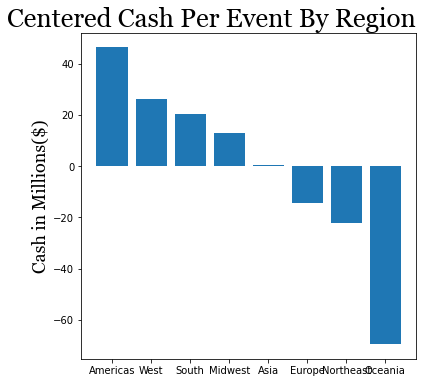

In [8]:
import matplotlib.pyplot as plt
region_totals = top_earners.groupby(['Region']).mean().drop(columns=['PDGA #']).reset_index()
region_totals['centered_cpe'] = region_totals['CPE'] - np.mean(region_totals['CPE'])
region_totals = region_totals.sort_values(by=['CPE'],ascending=False)

title_font = {'family':'georgia', 'size':26}
label_font = {'family':'georgia', 'size':18}
tick_font = {'family':'georgia', 'size':14}

plt.figure(figsize=(6,6))
plt.bar(region_totals['Region'],region_totals['centered_cpe'])
plt.title('Centered Cash Per Event By Region', fontdict=title_font, loc='right')
plt.ylabel('Cash in Millions($)',fontdict=label_font)
plt.show()

In [9]:
states = top_earners['State/Province'].unique()
state_count_dict = {}
for state in states:
    state_count_dict.update({state : 0})
for state in top_earners['State/Province']:
    state_count_dict[state] += 1
print(top_earners[top_earners['Region'] == 'Americas'])

               Name  PDGA #  Rating  Gender         Division Country  \
51       T. Gilbert   85850    1023    Male             Open  Canada   
165    C. Hanemayer   67314    1012    Male             Open  Canada   
201       M. Hendel   39469    1028    Male             Open  Canada   
356      C. Ozolins   55049    1013    Male             Open  Canada   
495       C. Zanini   81717    1003    Male             Open  Canada   
...             ...     ...     ...     ...              ...     ...   
3770      S. Beuker   66278     982    Male             Open  Canada   
3780       S. Pentz   81408     907    Male  Pro Masters 40+  Canada   
3848  D. Hochhalter  148940     943    Male             Open  Canada   
3850     J. MacLeod   66462     922    Male  Pro Masters 50+  Canada   
3887     K. O'Neill  100280     835  Female       Open Women  Canada   

        State/Province  Events  Points      Cash     PPE     CPE    Region  
51             Ontario      27   23450  13990.00  868.52  